<a href="https://colab.research.google.com/github/mtomcanyi/colab-public/blob/main/GitHubIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GitHub Integration Essentials

## Code and data split
Code can be stored on GitHub and data can be stored on Google Drive. One time token authorization is needed for the duration of the session.

Root of the drive is mounted at `/content/drive/MyDrive`

In [2]:
from google.colab import drive

drive.mount('/content/drive');
drivePfx = '/content/drive/MyDrive'

Mounted at /content/drive


## Package versions
Quick dump of Python and package versions available in Colab

In [3]:
! python -V

for package in ['numpy','pandas','matplotlib','sklearn','bs4','requests','seaborn']:
  ! echo "-----------------------"
  ! pip show $package

Python 3.7.12
-----------------------
Name: numpy
Version: 1.19.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, scikit-image, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, ge

## Package installation
Running installation via terminal command


In [4]:
# BeautifulSoup web scraping stack already installed

#!pip install bs4
#!pip install requests

## Imports and setup
Package imports needed for cells below

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Make visualizations bigger and better looking - credits to Julia Evans(@b0rk)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,5)

## Test data



*   Originates from [Prague Water and Sewage Services](https://www.pvk.cz/vse-o-vode/cena-vodneho-a-stocneho/vyvoj-vodneho-a-stocneho-v-praze/)
*   Table entry: *Od roku 1998 sjednoceno*
*   In *Obdobi* (en: *Period*) kept only starting year
*   Renamed columns to `Year, Water, Sewer`
*   Saved resulting CSV onto `MyDrive/Hackhealth2021/WaterSewerPrague.csv`
*   Saved same CSV as Google Sheet `WaterSewer`



## Read and preview a file stored on mounted drive
Drive gets mounted at root with all subdirectories available



In [6]:
wsDF = pd.read_csv(f'{drivePfx}/Hackhealth2021/WaterSewerPrague.csv', index_col='Year')
wsDF

,Water,Sewer,Total
Year,,,
2000,18.64,13.99,32.63
2001,19.77,15.33,35.10
2002,20.65,17.12,37.77
2003,20.72,17.85,38.57
2004,21.95,19.48,41.43
2005,22.79,19.96,42.75
2006,23.51,20.85,44.36
2007,26.74,22.93,49.67
2008,27.76,23.81,51.57


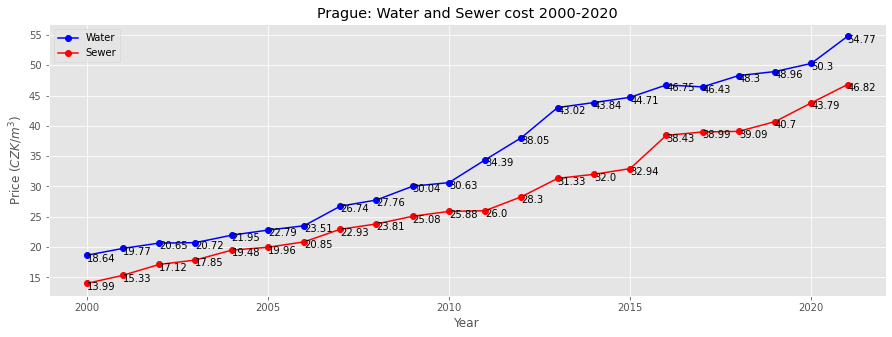

In [7]:
# Long form. Year is an index
# plt.plot(wsDF.index,wsDF['Water'],'bo-',wsDF.index,wsDF['Sewer'],'ro-');

ax = plt.plot(wsDF['Water'],'bo-',wsDF['Sewer'],'ro-');

plt.title('Prague: Water and Sewer cost 2000-2020')
plt.xlabel('Year')
plt.ylabel(r'Price ($CZK/m^3)$')
plt.rcParams['figure.figsize'] = (21,13)
plt.legend(['Water','Sewer'])

for rowIdx,rowData in wsDF.iterrows():
  ax[0].axes.text(rowIdx,rowData['Water']-1,rowData['Water'])
  ax[1].axes.text(rowIdx,rowData['Sewer']-1,rowData['Sewer'])


## Write data to a file on drive

In [8]:
# Boolean indexing does not return copy by default
wsFiveYearDF=wsDF[wsDF.index % 5 == 0].copy()
wsFiveYearDF['WaterIncreasePct'] = wsFiveYearDF['Water'].pct_change()*100
wsFiveYearDF['SewerIncreasePct'] = wsFiveYearDF['Sewer'].pct_change()*100

wsFiveYearDF['WaterIncreasePct'] = wsFiveYearDF['WaterIncreasePct'].round(2)
wsFiveYearDF['SewerIncreasePct'] = wsFiveYearDF['SewerIncreasePct'].round(2)

wsFiveYearDF
wsFiveYearDF.to_csv(f'{drivePfx}/Hackhealth2021/PriceIncrease.csv')


## Flush and unmount drive

In [9]:
# Uncomment to flush and unmount the drive
# drive.flush_and_unmount()

## Access data in Google Sheets

In [10]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

from pprint import pprint

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('WaterSewer').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print('-------------[ Row dump ]--------------')
pprint(rows[:5])
print('---------------------------------------')

# First row contains column names
headerRow = rows.pop(0)


# Convert to a DataFrame and render.
sheetDF = pd.DataFrame.from_records(rows,columns=headerRow,index='Year')
sheetDF

-------------[ Row dump ]--------------
[['Year', 'Water', 'Sewer', 'Total'],
 ['2000', '18.64', '13.99', '32.63'],
 ['2001', '19.77', '15.33', '35.1'],
 ['2002', '20.65', '17.12', '37.77'],
 ['2003', '20.72', '17.85', '38.57']]
---------------------------------------


,Water,Sewer,Total
Year,,,
2000,18.64,13.99,32.63
2001,19.77,15.33,35.1
2002,20.65,17.12,37.77
2003,20.72,17.85,38.57
2004,21.95,19.48,41.43
2005,22.79,19.96,42.75
2006,23.51,20.85,44.36
2007,26.74,22.93,49.67
2008,27.76,23.81,51.57


## Web scraping
Scraping the data straight from the web page

In [11]:
import requests
from bs4 import BeautifulSoup

# Note: exception to quietly stop current and subsequent cell executions
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

response = requests.get("https://www.pvk.cz/vse-o-vode/cena-vodneho-a-stocneho/vyvoj-vodneho-a-stocneho-v-praze/")
if (response.status_code != 200):
  raise RuntimeError(f'Error retrieving PVK page. Received HTTP status code {response.status_code}')

soup = BeautifulSoup(response.content,"html.parser")

# Semantic selection: find data table immediately following by title
h1 = soup.find("h1",text="Vývoj vodného a stočného v Praze")
dataTable = next(tag for tag in h1.next_siblings if tag.name == "table")

tableRows = dataTable.tbody.find_all("tr")
rowEntries = []
for row in tableRows:
  tableColumns = row.find_all(["td"])
  colEntries = []
  for col in tableColumns:
    colEntries.append(col.get_text(strip=True))
  
  rowEntries.append(colEntries)

# DeleteMe column: 
# The completely empty row in HTML table gets parsed to 5 columns
# So we add synthetic DeleteMe column to accommodate the row
parsedDF = pd.DataFrame(data=rowEntries,columns=["Period","Water","Sewage","Total","DeleteMe"])
parsedDF

,Period,Water,Sewage,Total,DeleteMe
0,None,None,None,None,None
1,None,None,None,None,None
2,- 31.12.1990,"0,60","0,20","0,80",None
3,1.1.1991 - 1.8.1992,"1,50","1,50","3,00",None
4,1.9.1992 - 14.5.1993,"5,00","4,00","9,00",None
5,15.5.1993-31.1.1994,"7,10","5,40","12,50",None
6,1.2.1994 - 31.1.1995,"8,40","6,60","15,00",None
7,1.2.1995 -31.1.1996,"9,20","7,10","16,30",None
8,1.2.1996-31.12.1996,"10,61","7,96","18,57",None
9,1.1.1997 -31.12.1997,"12,18","9,49","21,67",None


### Cleansing 1
Drop first two empty rows. They represent the headers and hold no data so they
came completely empty

Also drop the `DeleteMe` columns which was only needed to create the dataframe.


In [21]:
dataOnlyDF = parsedDF.drop(columns="DeleteMe").drop([0,1])

# reset index after dropping rows so it's easy 
# to inspect starting row position for the slice
dataOnlyDF = dataOnlyDF.reset_index(drop=True)
dataOnlyDF

,Period,Water,Sewage,Total
0,- 31.12.1990,"0,60","0,20","0,80"
1,1.1.1991 - 1.8.1992,"1,50","1,50","3,00"
2,1.9.1992 - 14.5.1993,"5,00","4,00","9,00"
3,15.5.1993-31.1.1994,"7,10","5,40","12,50"
4,1.2.1994 - 31.1.1995,"8,40","6,60","15,00"
5,1.2.1995 -31.1.1996,"9,20","7,10","16,30"
6,1.2.1996-31.12.1996,"10,61","7,96","18,57"
7,1.1.1997 -31.12.1997,"12,18","9,49","21,67"
8,- 31.12.1990,"3,70","2,35","6,05"
9,1.1.1991 - 30.6.1992,"4,50","3,50","8,00"


## Cleansing 2
Take only the period when pricing was unified between households and industrial consumers.

I.e. Keep only rows under HTML table section `Od roku 1998 sjednoceno`, starting with year 1998.


In [46]:
# Making explicit copy here as the slice seems to return view
# judging from unifiedDF._is_view returning True without copy()
# Using a view in subsequent cell then causes SettingWithCopyWarning
unifiedDF = dataOnlyDF[19:].copy()
unifiedDF._is_view

False

## Cleansing 3
Replace comma in number format with dot to allow parsing to float

In [47]:
# Use apply() as we need to access the .str for string replace
cols = ["Water","Sewage","Total"]
unifiedDF[cols] = unifiedDF[cols].apply(lambda col : col.str.replace(",","."))

unifiedDF

,Period,Water,Sewage,Total
19,1.1.1998 - 31.1.1999,14.62,11.57,26.19
20,1.2.1999 - 31.12.1999,16.81,13.14,29.95
21,1.1.2000 - 31.12.2000,18.64,13.99,32.63
22,1.1.2001 - 31.12.2001,19.77,15.33,35.10
23,1.1.2002 - 31.12.2002,20.65,17.12,37.77
24,1.1.2003 - 31.12.2003,20.72,17.85,38.57
25,1.1.2004 - 31.12.2004,21.95,19.48,41.43
26,1.1.2005 - 31.12.2005,22.79,19.96,42.75
27,1.1.2006 - 31.12.2006,23.51,20.85,44.36
28,1.1.2007 - 31.12.2007,26.74,22.93,49.67


## Cleansing 4
Convert numeric columns into float

In [48]:
cols = ["Water","Sewage","Total"]

# Use apply() because pandas.to_numeric() expects Series or single column
unifiedDF[cols] = unifiedDF[cols].apply(pd.to_numeric)

unifiedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 19 to 45
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Period  27 non-null     object 
 1   Water   27 non-null     float64
 2   Sewage  27 non-null     float64
 3   Total   27 non-null     float64
dtypes: float64(3), object(1)
memory usage: 996.0+ bytes


In [49]:
# Reset index after slice
unifiedDF = unifiedDF.reset_index(drop=True)

# Fix last entry for easy parsing
unifiedDF.iat[26,0]="1.1.2021 - 31.12.2021"

# Notice the second .str to allow vectorized integer indexing
unifiedDF["PeriodFrom"] = unifiedDF["Period"].str.split("-").str[0]
unifiedDF

,Period,Water,Sewage,Total,PeriodFrom
0,1.1.1998 - 31.1.1999,14.62,11.57,26.19,1.1.1998
1,1.2.1999 - 31.12.1999,16.81,13.14,29.95,1.2.1999
2,1.1.2000 - 31.12.2000,18.64,13.99,32.63,1.1.2000
3,1.1.2001 - 31.12.2001,19.77,15.33,35.10,1.1.2001
4,1.1.2002 - 31.12.2002,20.65,17.12,37.77,1.1.2002
5,1.1.2003 - 31.12.2003,20.72,17.85,38.57,1.1.2003
6,1.1.2004 - 31.12.2004,21.95,19.48,41.43,1.1.2004
7,1.1.2005 - 31.12.2005,22.79,19.96,42.75,1.1.2005
8,1.1.2006 - 31.12.2006,23.51,20.85,44.36,1.1.2006
9,1.1.2007 - 31.12.2007,26.74,22.93,49.67,1.1.2007


In [50]:
# Let's use regex for a change
unifiedDF = unifiedDF.drop(columns="Period")
unifiedDF["PeriodFrom"] = unifiedDF["PeriodFrom"].str.replace(".*\.","",regex=True)
unifiedDF = unifiedDF.rename(columns={"PeriodFrom" : "Year"})
unifiedDF


,Water,Sewage,Total,Year
0,14.62,11.57,26.19,1998
1,16.81,13.14,29.95,1999
2,18.64,13.99,32.63,2000
3,19.77,15.33,35.10,2001
4,20.65,17.12,37.77,2002
5,20.72,17.85,38.57,2003
6,21.95,19.48,41.43,2004
7,22.79,19.96,42.75,2005
8,23.51,20.85,44.36,2006
9,26.74,22.93,49.67,2007
